# Homework 4

INFO 5871-001
Fall 2019

_Keke Wu_

# Visualization
In this assignment, we will explore a number of different types of visualization using the Ames housing data. All plots will be done using the `seaborn` package.

### Imports

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data
Note that are only selecting some of the many columns. After loading, we drop the known anomalous data points as before. We also use `copy()` because we will be modifying the data frame later.

In [2]:
columns = ['Neighborhood', 'Lot.Area', 'Bldg.Type', 'House.Style', 
           'TotRms.AbvGrd', 'Gr.Liv.Area', 'Full.Bath', 'Half.Bath', 
           'Central.Air', 'Year.Built', 'SalePrice']

ames_original = pd.read_csv('ames.csv', usecols=columns)

In [3]:
drop_anomaly = ames_original['Gr.Liv.Area'] <= 4000
# We use copy here because we will be modifying the data frame later
ames = ames_original[drop_anomaly].copy()
print (ames.shape)
ames.head()

(2925, 11)


,Lot.Area,Neighborhood,Bldg.Type,House.Style,Year.Built,Central.Air,Gr.Liv.Area,Full.Bath,Half.Bath,TotRms.AbvGrd,SalePrice
0,31770,NAmes,1Fam,1Story,1960,Y,1656,1,0,7,215000
1,11622,NAmes,1Fam,1Story,1961,Y,896,1,0,5,105000
2,14267,NAmes,1Fam,1Story,1958,Y,1329,1,1,6,172000
3,11160,NAmes,1Fam,1Story,1968,Y,2110,2,1,8,244000
4,13830,Gilbert,1Fam,2Story,1997,Y,1629,2,1,6,189900


## Q1: Lot size

### [TODO] Distribution plot

Create a distribution plot (`distplot`) of the lot sizes.

You will see that the data is very left skewed. There are some really large lots, but not many. Use `kde=False` to get a count rather than fraction.

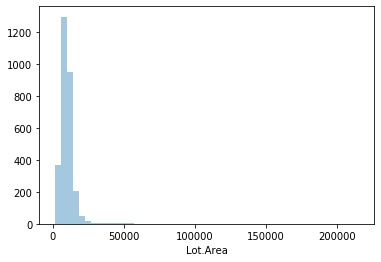

In [4]:
sns.distplot(ames['Lot.Area'], kde=False);

### [TODO] Log scale transformation

Repeat the plot, setting the x scale to logarithmic to reduce the skewed appearance.

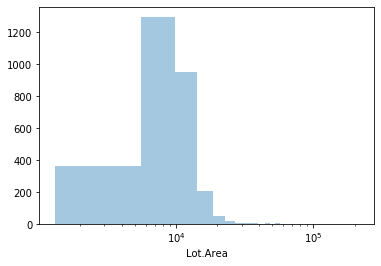

In [5]:
g = sns.distplot(ames['Lot.Area'], kde=False)
g.set_xscale('log')

### [TODO] Log transformation

Create a new column for the data frame with the logarithm (`np.log`) of the lot size. Call it `Lot.Log`.

In [6]:
ames['Lot.Log'] = np.log(ames['Lot.Area'])

### [TODO] Distribution log value

Replot the lot size distribution using the log-transformed value.

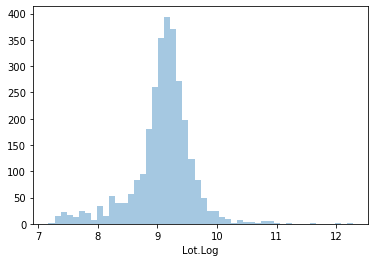

In [7]:
sns.distplot(ames['Lot.Log'], kde=False);

### [TODO] Test for normality

The distribution appears to be normal. That would imply that the original lot size distribution is "log-normal", which would be typical for this kind of data element. Create a `probplot` to test this hypothesis as we did in Homework 3.

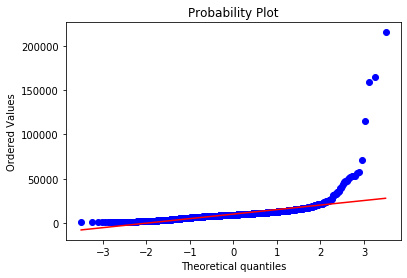

In [8]:
st.probplot(ames['Lot.Area'], dist='norm', plot = plt);

### [TODO] Conclusion

What does the normal probability plot indicate about tails of this distribution?

Answer: _This distribution is heavy-tailed to the right, and a little bit light-tailed to the left, all other X-Y values are generally lieing along the hypothetical straight line, which confirms our hypothesis that the original lot size distribution is "log-normal"._

## Q2: Sale price and square footage

### Rename the columns so they are easier to work with

Note that we use a dictionary with the old and new names and we use the `inplace=True` flag so that we don't make an unnecessary copy of the data frame.

In [9]:
column_dict = {'Lot.Area': 'Lot', 'Neighborhood':'Nhood', 'Bldg.Type':'Type', 
               'House.Style':'Style', 'Year.Built':'Year', 'Central.Air':'AC', 
               'Gr.Liv.Area':'SqFt', 'Full.Bath':'FBath', 'Half.Bath':'HBath', 
               'TotRms.AbvGrd':'Rooms', 'SalePrice':'Price', 'Lot.Log':'Lot.Log'}
ames.rename(columns=column_dict, inplace=True)

### [TODO] Filter for type

We know that house type makes a big difference in understanding price relationships. We now limit our study just to the single family homes. 

Create a data frame with just the single family homes. Use `copy()` because we will be modifying the data frame.

In [10]:
single_family = ames[ames.Type == '1Fam'].copy()
single_family.head()

,Lot,Nhood,Type,Style,Year,AC,SqFt,FBath,HBath,Rooms,Price,Lot.Log
0,31770,NAmes,1Fam,1Story,1960,Y,1656,1,0,7,215000,10.366278
1,11622,NAmes,1Fam,1Story,1961,Y,896,1,0,5,105000,9.360655
2,14267,NAmes,1Fam,1Story,1958,Y,1329,1,1,6,172000,9.565704
3,11160,NAmes,1Fam,1Story,1968,Y,2110,2,1,8,244000,9.320091
4,13830,Gilbert,1Fam,2Story,1997,Y,1629,2,1,6,189900,9.534595


### [TODO] Scatter plot of sale price and living area

We did a similar plot in Homework 2. This time in seaborn. Put `SqFt` on the x axis, as price is ostensibly the dependent variable.

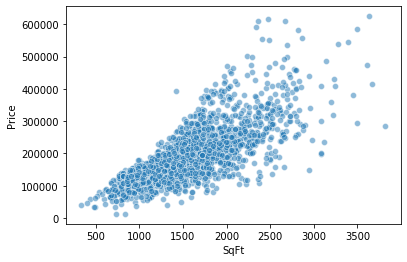

In [11]:
sns.scatterplot(data=single_family, x='SqFt', y='Price', alpha=0.5);

### [TODO] Label the outlier

There is a strong outlier at a high sq ft price that expect. Replot, add a label pointing to this point with the note: 'Overpaid?'

Steps
- First find the point. (Hint: Create a set of filters based on the values of `SqFt` and `Price` until the `sum()` is equal to 1.
- Then create a `g.text` annotation for it. You'll need to tinker with the exact x and y location to get a good appearance.

In [12]:
outlier_filter = (single_family.SqFt < 1500) & (single_family.SqFt > 1000) & (single_family.Price > 30000) & (single_family.Price < 41000)

In [13]:
sum(outlier_filter)

1

In [14]:
single_family[outlier_filter]

,Lot,Nhood,Type,Style,Year,AC,SqFt,FBath,HBath,Rooms,Price,Lot.Log
1555,8500,IDOTRR,1Fam,2Story,1920,N,1317,1,0,6,40000,9.047821


## Q3: Bivariate pair plot

### [TODO] New columns

Create a new column called `BathCount` that contains the number of full baths plus 2 x the number of half-baths. 

Create a new column called `Age` that contains 2010 - `Year.Built`. 

Use `pairplot` to show the relationship between all the columns of the single family data frame.

In [15]:
single_family['BathCount'] = ames.FBath + 2*ames.HBath

In [16]:
single_family['Age'] = 2010 - ames.Year

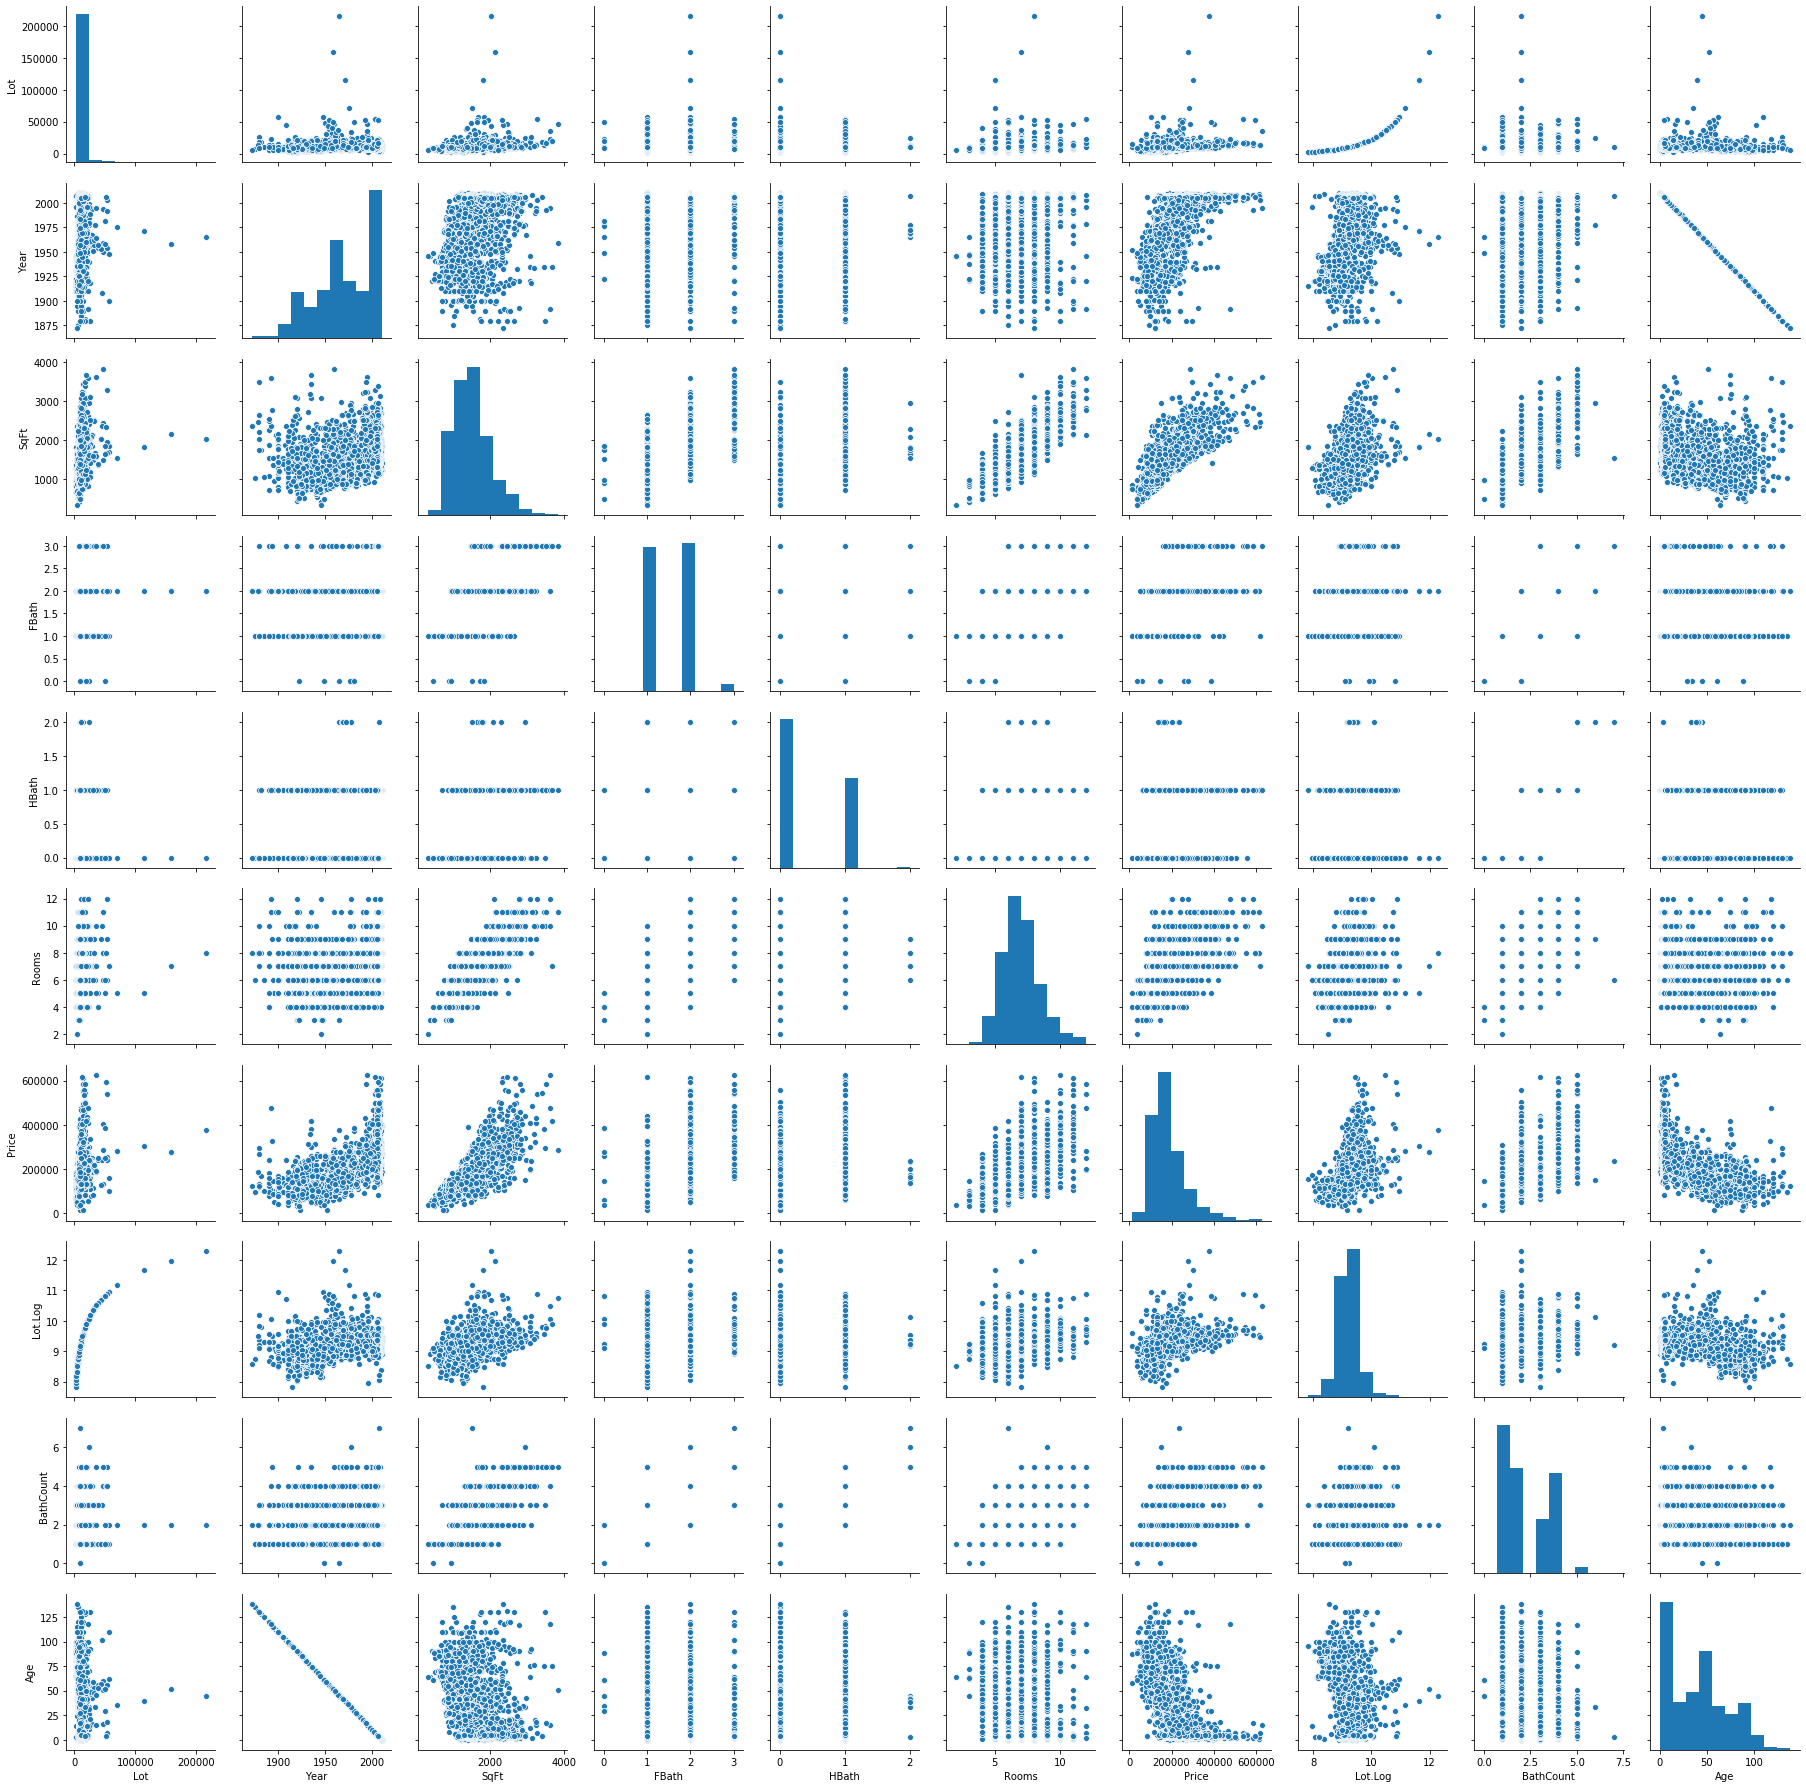

In [17]:
sns.pairplot(single_family);

### [TODO] Visualize variable relationships 

Use `pairplot` with the columns provided.

In [18]:
cols = ['SqFt', 'Age', 'Rooms', 'BathCount', 'Lot.Log', 'Price']

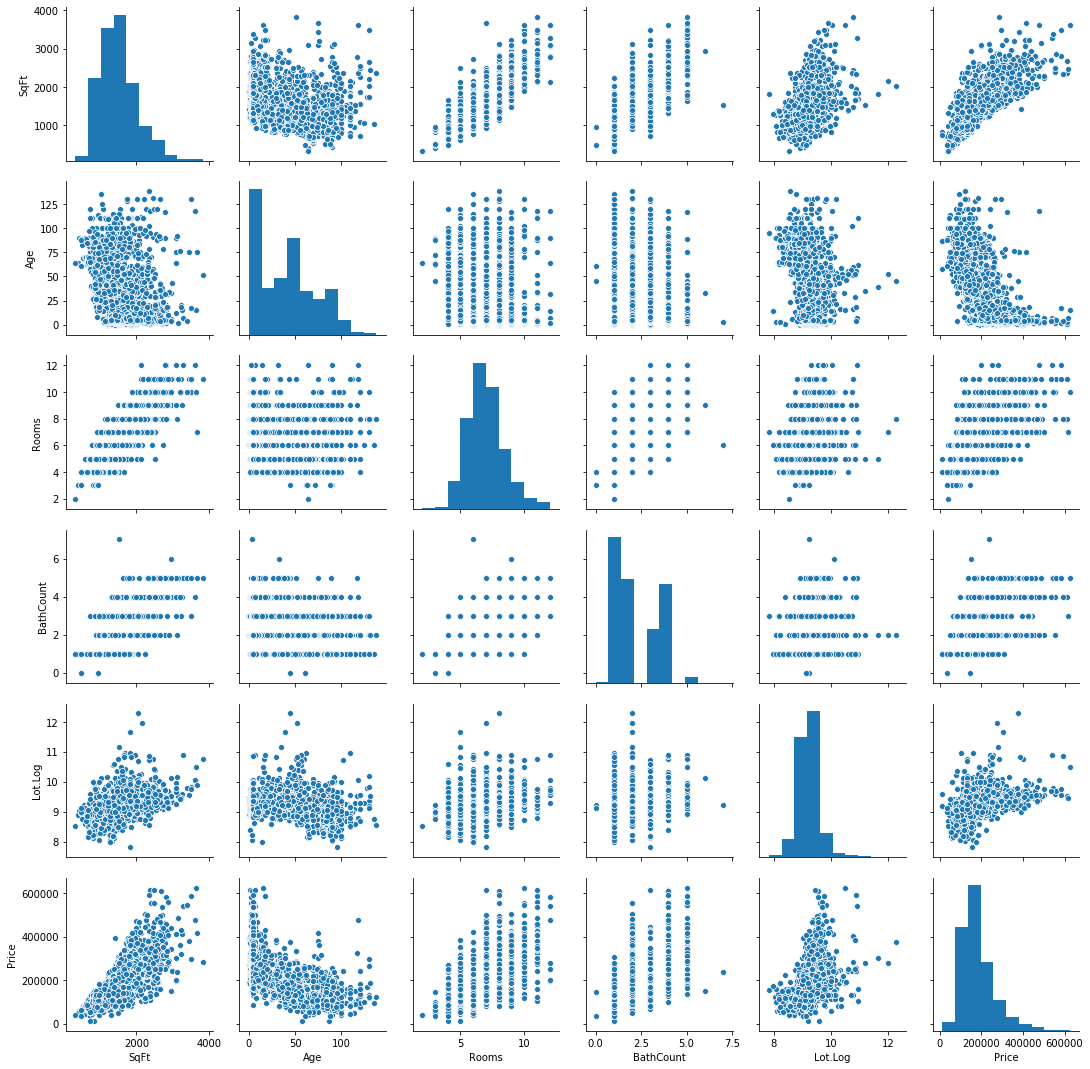

In [20]:
sns.pairplot(single_family[cols]);

### [TODO] Analysis

Which two variables have a relationship that seems the most "linear"? Is there an obvious explanation for the relationship?

Answer: _Rooms and SqFt have the most 'linear' relationship, and are seemingly correlated, which can be apprently explained by the fact that the bigger the space is, the more rooms it can have._

## Q4: House Style

Next, we will look at the impact of House Style on other aspects of the house.

### [TODO] Create a histogram of house styles

Use `countplot`

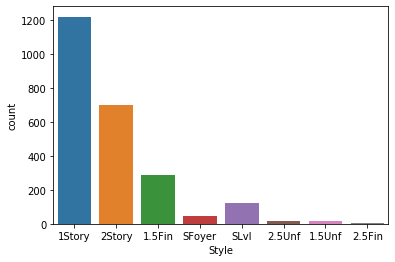

In [21]:
sns.countplot(single_family.Style);

### [TODO] Filter

Some housing styles are less common. We will combine these into the larger groups. `sFoyer` + `SLvl`, `1.5Unf `+ `1Story`, `2.5 Unf `+ `2.5Fin` + `2Story`. We'll do this by create a new column `NStyle` and setting it to the values `Split`, `1Story` and `2Story`. 

In [22]:
single_family['NStyle'] = 'Split'
split_filter = (single_family.Style == 'SFoyer') | (single_family.Style == 'SLvl')
single_family.loc[split_filter, 'NStyle'] = 'Split'
one_story_filter = ((single_family.Style == '1.5Fin') | (single_family.Style == '1Story'))
single_family.loc[one_story_filter, 'NStyle'] = '1Story'
two_story_filter = (single_family.Style == '2.5Unf') | (single_family.Style == '2.5Fin') | (single_family.Style == '2Story')
single_family.loc[two_story_filter, 'NStyle'] = '2Story'
single_family.head()

,Lot,Nhood,Type,Style,Year,AC,SqFt,FBath,HBath,Rooms,Price,Lot.Log,BathCount,Age,NStyle
0,31770,NAmes,1Fam,1Story,1960,Y,1656,1,0,7,215000,10.366278,1,50,1Story
1,11622,NAmes,1Fam,1Story,1961,Y,896,1,0,5,105000,9.360655,1,49,1Story
2,14267,NAmes,1Fam,1Story,1958,Y,1329,1,1,6,172000,9.565704,3,52,1Story
3,11160,NAmes,1Fam,1Story,1968,Y,2110,2,1,8,244000,9.320091,4,42,1Story
4,13830,Gilbert,1Fam,2Story,1997,Y,1629,2,1,6,189900,9.534595,4,13,2Story


### [TODO] Histogram of new style

Redo the `countplot` above with `NStyle` instead.

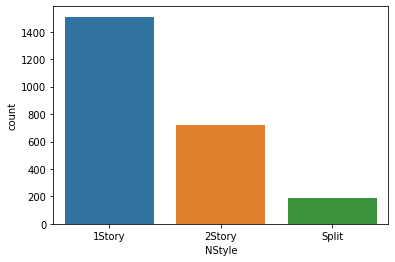

In [23]:
sns.countplot(single_family.NStyle);

### Normalized price

Next we will look at price per square foot in these different house configurations. First create a `PriceSqFt` column.

In [24]:
single_family['PriceSqFt'] = single_family.Price / single_family.SqFt

### Bar plot of average price per square foot

This is a `catplot` of `kind=bar`

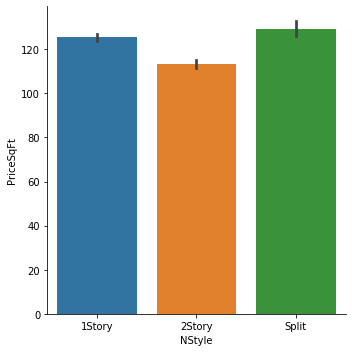

In [25]:
sns.catplot(data=single_family, x='NStyle', y='PriceSqFt', kind='bar');

### [TODO] Strip chart showing the distribution

Use `alpha=0.3` so the density of the plotting is clearer.

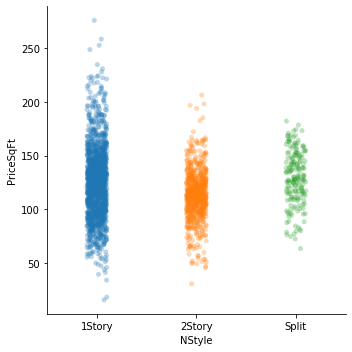

In [26]:
sns.catplot(data=single_family, x='NStyle', y='PriceSqFt', alpha=0.3);

### [TODO] Effect of AC

Create a split violin plot of price per square foot vs `NStyle` using the `AC` column to split. We are going to output this plot as a PDF file, so we want user-friend labels and titling. See the output sample file `violin-plot.pdf` to see the desired output.

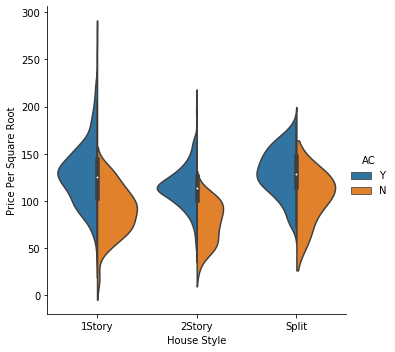

In [27]:
g = sns.catplot(data=single_family, x='NStyle', y='PriceSqFt', kind='violin', split=True,hue='AC')
g.ax.set_xlabel('House Style');
g.ax.set_ylabel('Price Per Square Root');

### [TODO] Output in PDF format

In [28]:
g.savefig('Effect_of_AC.pdf', format='pdf')

## Q5: Construction booms

### [TODO] Create a distplot of `Age`

You'll need to use `dropna()` because some are unknown. Create 50 bins.

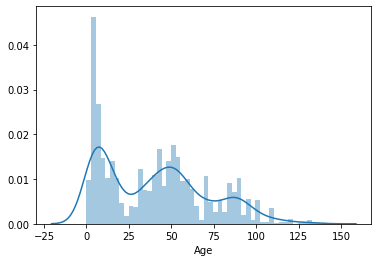

In [46]:
single_family.dropna(axis = 0, subset=['Age'], inplace =True)
sns.distplot(single_family.Age, bins=50);

### [TODO] Comparing the booms

There seem to be three different periods in which houses were built in this city. Age = 0-25, 25-70, 70-100. Create a categorical column `Era` to distinguish these, using `cut` and the given bins.

In [64]:
age_bins = [0, 25, 70, 100, 200]
single_family['Era'] = pd.cut(single_family.Age, age_bins)
single_family.head()

,Lot,Nhood,Type,Style,Year,AC,SqFt,FBath,HBath,Rooms,Price,Lot.Log,BathCount,Age,NStyle,PriceSqFt,Era
0,31770,NAmes,1Fam,1Story,1960,Y,1656,1,0,7,215000,10.366278,1,50,1Story,129.830918,"(25, 70]"
1,11622,NAmes,1Fam,1Story,1961,Y,896,1,0,5,105000,9.360655,1,49,1Story,117.187500,"(25, 70]"
2,14267,NAmes,1Fam,1Story,1958,Y,1329,1,1,6,172000,9.565704,3,52,1Story,129.420617,"(25, 70]"
3,11160,NAmes,1Fam,1Story,1968,Y,2110,2,1,8,244000,9.320091,4,42,1Story,115.639810,"(25, 70]"
4,13830,Gilbert,1Fam,2Story,1997,Y,1629,2,1,6,189900,9.534595,4,13,2Story,116.574586,"(0, 25]"


### [TODO] Plot the distribution of room counts across these bins

This is a `catplot` of `kind=count`. Specify `col='Era'` to split by Era.


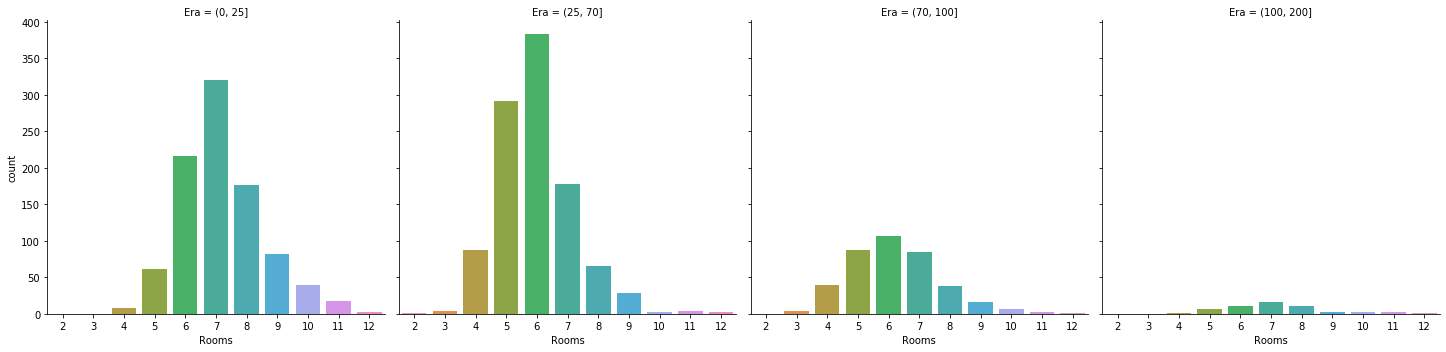

In [74]:
sns.catplot(data=single_family, x='Rooms', kind='count', col='Era');

### [TODO] Plot a heatmap of rooms and era

Do this by computing a `crosstab` first and then calling the `heatmap` plotting function on that.

In [77]:
tbl = pd.crosstab(single_family.Era, single_family.Rooms)
tbl

Rooms,2,3,4,5,6,7,8,9,10,11,12
Era,,,,,,,,,,,
"(0, 25]",0,0,8,62,216,321,177,82,40,17,3
"(25, 70]",1,4,88,292,383,178,66,29,3,4,2
"(70, 100]",0,4,39,88,106,85,38,16,7,3,1
"(100, 200]",0,0,1,6,11,16,11,2,3,3,1


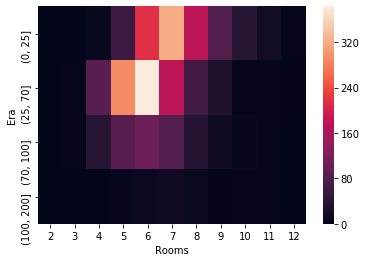

In [79]:
sns.heatmap(tbl);